#Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

#Carga de datos

In [ ]:
!gdown -q --fuzzy https://drive.google.com/file/d/1ma_zD4JLN69u_IOsTfnNoRbt6CGv9_ab/view
!unzip /content/cabaventa.zip 

Archive:  /content/cabaventa.zip
  inflating: cabaventa.csv           


In [ ]:
df = pd.read_csv('/content/cabaventa.csv', index_col="id", parse_dates = ['start_date','end_date','created_on'])

#Exploración

##Estadísticas descriptivas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183810 entries, hjHZd/BZqSBy3zb+RrqPYg== to fJLVUIziPl31ACoaE/fj1g==
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       183810 non-null  int64         
 1   Unnamed: 0.1     183810 non-null  int64         
 2   ad_type          183810 non-null  object        
 3   start_date       183810 non-null  datetime64[ns]
 4   end_date         183810 non-null  object        
 5   created_on       183810 non-null  datetime64[ns]
 6   lat              172362 non-null  float64       
 7   lon              172362 non-null  float64       
 8   l1               183810 non-null  object        
 9   l2               183810 non-null  object        
 10  l3               181963 non-null  object        
 11  l4               7263 non-null    object        
 12  l5               0 non-null       float64       
 13  l6               0 non-null       floa

In [ ]:
df.describe(datetime_is_numeric = True)

,Unnamed: 0,Unnamed: 0.1,start_date,created_on,lat,lon,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,183810.000000,183810.000000,183810,183810,172362.000000,172362.000000,0.0,0.0,155680.000000,133834.000000,158892.000000,122908.00000,121282.000000,1.804180e+05
mean,134021.664452,503011.040422,2020-12-01 04:51:38.573527040,2020-12-01 04:51:38.573527040,-34.590007,-58.462583,NaN,NaN,2.706719,1.983696,1.584221,174.63733,148.706692,2.967191e+05
min,43.000000,137.000000,2020-05-24 00:00:00,2020-05-24 00:00:00,-53.788624,-100.469651,NaN,NaN,1.000000,-2.000000,1.000000,10.00000,1.000000,0.000000e+00
25%,67547.250000,249768.250000,2020-08-28 00:00:00,2020-08-28 00:00:00,-34.615663,-58.464658,NaN,NaN,2.000000,1.000000,1.000000,45.00000,41.000000,9.900000e+04
50%,134740.500000,513589.500000,2020-11-18 00:00:00,2020-11-18 00:00:00,-34.596872,-58.439264,NaN,NaN,3.000000,2.000000,1.000000,70.00000,60.000000,1.590000e+05
75%,200518.750000,748791.750000,2021-03-22 00:00:00,2021-03-22 00:00:00,-34.577306,-58.408084,NaN,NaN,4.000000,3.000000,2.000000,127.00000,103.000000,2.800000e+05
max,265124.000000,999997.000000,2021-06-17 00:00:00,2021-06-17 00:00:00,29.753374,-5.490771,NaN,NaN,40.000000,286.000000,20.000000,140380.00000,950000.000000,1.110000e+08
std,76980.476727,291528.040604,NaN,NaN,0.376025,0.514948,NaN,NaN,1.520259,2.327565,0.963704,1461.00811,3064.441474,8.512916e+05


In [ ]:
df.describe(include = 'object')

,ad_type,end_date,l1,l2,l3,l4,currency,price_period,title,description,property_type,operation_type
count,183810,183810,183810,183810,181963,7263,180136,88720,183810,183810,183810,183810
unique,1,449,1,1,57,4,2,1,98827,141615,10,1
top,Propiedad,9999-12-31,Argentina,Capital Federal,Palermo,Palermo Hollywood,USD,Mensual,Departamento - Palermo,Pozo en Villa Crespo. Monoambientes y Versátil...,Departamento,Venta
freq,183810,33573,183810,183810,25169,3178,179806,88720,1127,98,134044,183810


In [ ]:
df.corr()

,Unnamed: 0,Unnamed: 0.1,lat,lon,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
Unnamed: 0,1.000000,0.999864,-0.007118,-0.011269,NaN,NaN,-0.020606,-0.019251,-0.003921,0.002069,0.004157,-0.008350
Unnamed: 0.1,0.999864,1.000000,-0.007128,-0.011004,NaN,NaN,-0.021062,-0.019493,-0.003829,0.001997,0.004132,-0.008259
lat,-0.007118,-0.007128,1.000000,-0.147046,NaN,NaN,0.005438,0.004515,0.013015,0.035679,0.013339,0.000042
lon,-0.011269,-0.011004,-0.147046,1.000000,NaN,NaN,-0.010940,-0.007498,-0.002959,-0.082929,-0.059634,-0.007017
l5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,-0.020606,-0.021062,0.005438,-0.010940,NaN,NaN,1.000000,0.892345,0.630220,0.062606,0.055525,0.199550
bedrooms,-0.019251,-0.019493,0.004515,-0.007498,NaN,NaN,0.892345,1.000000,0.635658,0.066844,0.061682,0.165232
bathrooms,-0.003921,-0.003829,0.013015,-0.002959,NaN,NaN,0.630220,0.635658,1.000000,0.085118,0.074123,0.311149
surface_total,0.002069,0.001997,0.035679,-0.082929,NaN,NaN,0.062606,0.066844,0.085118,1.000000,0.619737,0.112825


##Exploración de variables

###Coordenadas

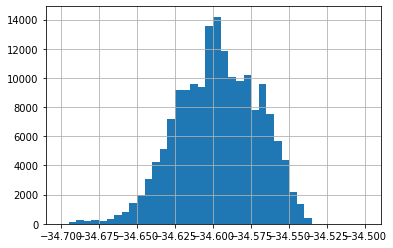

In [ ]:
df.lat.hist(bins = 40, range = (-34.7,-34.5));

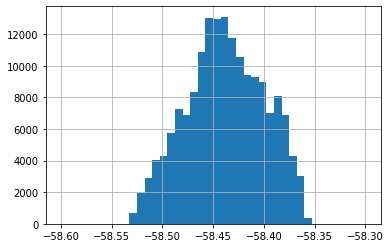

In [ ]:
df.lon.hist(bins = 40, range = (-58.6,-58.3));

###Barrios

In [ ]:
df.l3.value_counts()#No coincide con los barrios oficiales necesariamente

Palermo                 25169
Belgrano                21369
Caballito               11090
Recoleta                10382
Villa Urquiza            8373
Almagro                  8272
Villa Crespo             8211
Barrio Norte             5259
Flores                   5199
Nuñez                    5153
Balvanera                4805
Colegiales               3854
San Nicolás              3607
San Cristobal            3451
Villa Devoto             3228
Saavedra                 3121
Puerto Madero            3075
San Telmo                2766
Villa del Parque         2702
Floresta                 2462
Boedo                    2448
Monserrat                2378
Retiro                   2361
Mataderos                2273
Barracas                 2254
Liniers                  2078
Parque Chacabuco         1804
Villa Pueyrredón         1700
Coghlan                  1681
Villa Luro               1677
Congreso                 1385
Parque Patricios         1311
Chacarita                1308
Villa Luga

In [ ]:
df.l4.value_counts()

Palermo Hollywood    3178
Palermo Chico        2092
Palermo Soho         1636
Palermo Viejo         357
Name: l4, dtype: int64

###Superficie

In [ ]:
df.surface_total.hist(bins = 40, range = (0,1200));

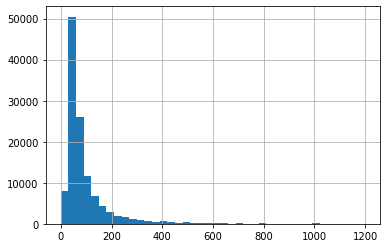

In [ ]:
df.surface_covered.hist(bins = 40, range = (0,1200));

###Baños

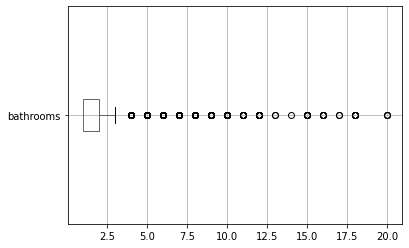

In [ ]:
df.boxplot('bathrooms', vert = False);

###Dormitorios

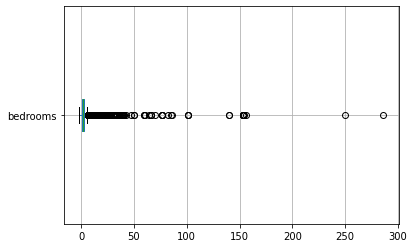

In [ ]:
df.boxplot('bedrooms', vert = False);

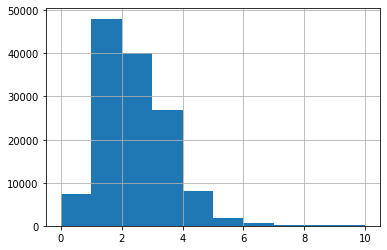

In [ ]:
df.bedrooms.hist(range = (0,10));

###Ambientes

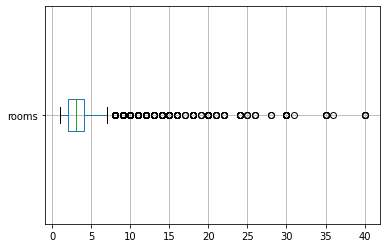

In [ ]:
df.boxplot('rooms', vert = False);

###Tipo de propiedad

In [ ]:
df['property_type'].value_counts()

Departamento       131720
PH                  13469
Casa                 8436
Lote                 6888
Local comercial      6357
Oficina              5669
Cochera              5129
Otro                 1434
Depósito              704
Name: property_type, dtype: int64

###Tipos de moneda

In [ ]:
df.currency.value_counts()

USD    179806
ARS       330
Name: currency, dtype: int64

###Período de precios

In [ ]:
df.price_period.value_counts()

Mensual    88720
Name: price_period, dtype: int64

###Precio

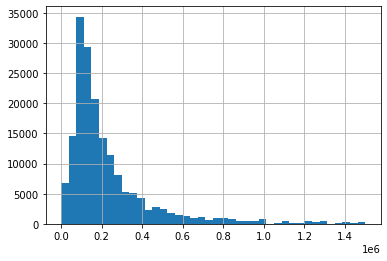

In [ ]:
df.price.hist(range = (0,1500000), bins = 40);

In [ ]:
(df.price > 1500000).sum()

3556

#Limpieza y procesamiento de datos

##Imputación

###Llenar coordenadas usando la información de los barrios

In [ ]:
df.loc[df.property_type == 'Casa de campo','property_type'] = 'Casa'

In [ ]:
coords = df[['l3','lon','lat']].groupby(by = 'l3').agg(['median'],axis = 'columns').to_dict()#quizás quiero construir este diccionario en otra parte para tener más coordenadas
lat_dict = coords[('lat','median')]
lon_dict = coords[('lon','median')]

In [ ]:
def fill_coords(row,lat_dict,lon_dict):
  if((math.isnan(row['lat']) or math.isnan(row['lon'])) and not pd.isna(row['l3'])):
    row['lat'] = lat_dict[row['l3']]
    row['lon'] = lon_dict[row['l3']]
  return row

In [ ]:
df = df.apply(lambda x: fill_coords(x,lat_dict,lon_dict), axis = 'columns')

###Imputación por KNN

In [ ]:
s = StandardScaler()
col = ['lat','lon','bathrooms','bedrooms','rooms','surface_total','surface_covered']
df[col] = s.fit_transform(df[col])

In [ ]:
maskdict = {}
for ptype in df.property_type.unique():
  maskdict[ptype] = (df.property_type == ptype)

In [ ]:
imp = KNNImputer(n_neighbors=2, weights="uniform")
for ptype, mask in maskdict.items():
  #if(ptype in ['',''])
  df.loc[mask,col] =imp.fit_transform(df.loc[mask,col])

In [ ]:
#imputador que no considera el tipo de propiedad
#imp = KNNImputer(n_neighbors=2, weights="uniform") # tiene add_indicator
#df[['lat','lon','bathrooms','bedrooms','rooms','surface_total','surface_covered']] = imp.fit_transform(df[['lat','lon','bathrooms','bedrooms','rooms','surface_total','surface_covered']])

In [ ]:
df[col] = s.inverse_transform(df[col])

In [ ]:
#En casos de empate puede hacer el promedio entre vecinos cercanos para llenar espacios vacíos. Así que se redondeará los valores no enteros.
to_round_list = ['bathrooms','bedrooms','rooms','surface_total','surface_covered']
df[to_round_list] = df[to_round_list].round(0) 

In [ ]:
df = df[(df.price.isna() == False) & (df.currency == 'USD')] #sacar también precios menores a 1000

In [ ]:
#no usar, no se imputa precios
#df[col + ['price']] = s.fit_transform(df[col + ['price']])
#for ptype, mask in maskdict.items():
#  df.loc[mask,col + ['price']] =imp.fit_transform(df.loc[mask,col + ['price']])
#df[col + ['price']] = s.inverse_transform(df[col + ['price']])

##Variables derivadas

###Logaritmo del precio

In [ ]:
df = df.assign(log_price = np.log(df.price));

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


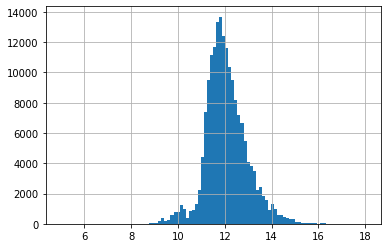

In [ ]:
df.log_price.hist(bins = 100, range = (5,18));

###Precio por m2

In [ ]:
#def pricedivsurf(row):
#  if((math.isnan(row['price']) == False) and (math.isnan(row['surface_total']) == False) and (row['surface_total'] > 0)):
#    row['price/surface_total'] = row['price']/row['surface_total']
#  else:
#    row['price/surface_total'] = np.nan
#  return row
#
#df = df.apply(pricedivsurf, axis = 'columns')

In [ ]:
#df.boxplot('price/surface_total')

###Categorías de precio (BAJO, MEDIO y ALTO)

In [ ]:
def discretize_price(row,q1,q2):
  if(row['log_price'] < q1):
    row['price_cat'] = 'BAJO'
  elif(row['log_price'] > q2):
    row['price_cat'] = 'ALTO'
  else:
    row['price_cat'] = 'MEDIO'
  return row

In [ ]:
#Usar assign sería más elegante
for ptype in df.property_type.unique():
  maskdict[ptype] = (df.property_type == ptype)
df['price_cat'] = 'NINGUNA'
for ptype in df.property_type.unique():
  q1,q2 = df.loc[maskdict[ptype],'log_price'].quantile([0.33,0.66])
  df[maskdict[ptype]] = df[maskdict[ptype]].apply(lambda x: discretize_price(x,q1,q2), axis = 'columns')

###Dummies a partir de keywords

In [ ]:
#normalización de la columna 'description'
df['description'] = df['description'].str.lower()
regexp = RegexpTokenizer('\w+')

df["description"] = df["description"].apply(regexp.tokenize)

stopwords = nltk.corpus.stopwords.words("spanish")
stopwords.extend(['es', 'osea', 'sólo','br'])

df["description"] = df["description"].apply(lambda texto: [token for token in texto if token not in stopwords])

df["description"] = df["description"].str.join(' ')

vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), min_df=0.005, max_df=0.7, strip_accents='ascii', max_features=2000, lowercase = False)
vectorized_data = vectorizer.fit_transform(df['description'])

In [ ]:
#keywords elegidas para las dummy
import numpy as np

keywords = ['balcon', 'living', 'sin expensas', 'comedor', 'excelente', 'dormitorio','amplio','dormitorios','dormitorio','lavadero', 'cocheras', 
            'luminoso', 'ubicacion','suite','parrilla','subte','banos','acondicionado','estacion','amenities', 'cochera','jardin']

for i in keywords:
  if i == 'sin expensas':
      #print ('sin expensas')
      df['sin_expensas'] = np.where(df['description'].str.contains(i), True, False)
  else:
    df[i] = np.where(df['description'].str.contains(i), True, False)


###Dummies a partir del tipo de propiedad



In [ ]:
df['property_type2'] = df.property_type #Copia de property_type para preservar el original al crear dummies, se necesita en otros pasos

In [ ]:
df = pd.get_dummies(df, columns=['property_type2'], prefix = 'prop')
prop = [s for s in df.columns if 'prop_' in s] #lista de los dummies

#Árboles de decisión

##Árbol de profundidad 4

###División entre conjunto de evaluación y desarrollo

In [ ]:
#no es necesario para stratify (pude correr el siguiente bloque sin problemas)
#le = LabelEncoder()
#le.fit(df.property_type)
#df['encoded_property_type'] = le.transform(df.property_type)

In [ ]:
keywords[2] = 'sin_expensas'
features = col + prop + keywords
target = ['price_cat','property_type']
x_desarrollo, x_holdout, y_desarrollo, y_holdout = train_test_split(df[features], df['price_cat'], test_size=0.20, random_state=42,stratify=df[target])

###División entre conjunto de entrenamiento y validación

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_desarrollo[features], y_desarrollo, test_size=0.20, random_state=42,stratify=df.loc[x_desarrollo.index, target])

###Entrenamiento del árbol

In [ ]:
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(x_train,y_train)

y_pred = tree.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(precision_score(y_val,y_pred,average = None))
print(recall_score(y_val,y_pred,average = None))
print(f1_score(y_val,y_pred,average = None))

tree.fit(x_desarrollo,y_desarrollo)

y_pred = tree.predict(x_holdout)

print(accuracy_score(y_holdout,y_pred))
print(precision_score(y_holdout,y_pred,average = None))
print(recall_score(y_holdout,y_pred,average = None))
print(f1_score(y_holdout,y_pred,average = None))

0.6654732524592444
[0.67398509 0.72019651 0.58535615]
[0.83410233 0.70039282 0.4598312 ]
[0.74554369 0.71015663 0.51505602]
0.6678160280295868
[0.68898029 0.72142487 0.57858947]
[0.79691601 0.70861996 0.49654023]
[0.73902792 0.71496508 0.53443403]


###Gráfico del árbol

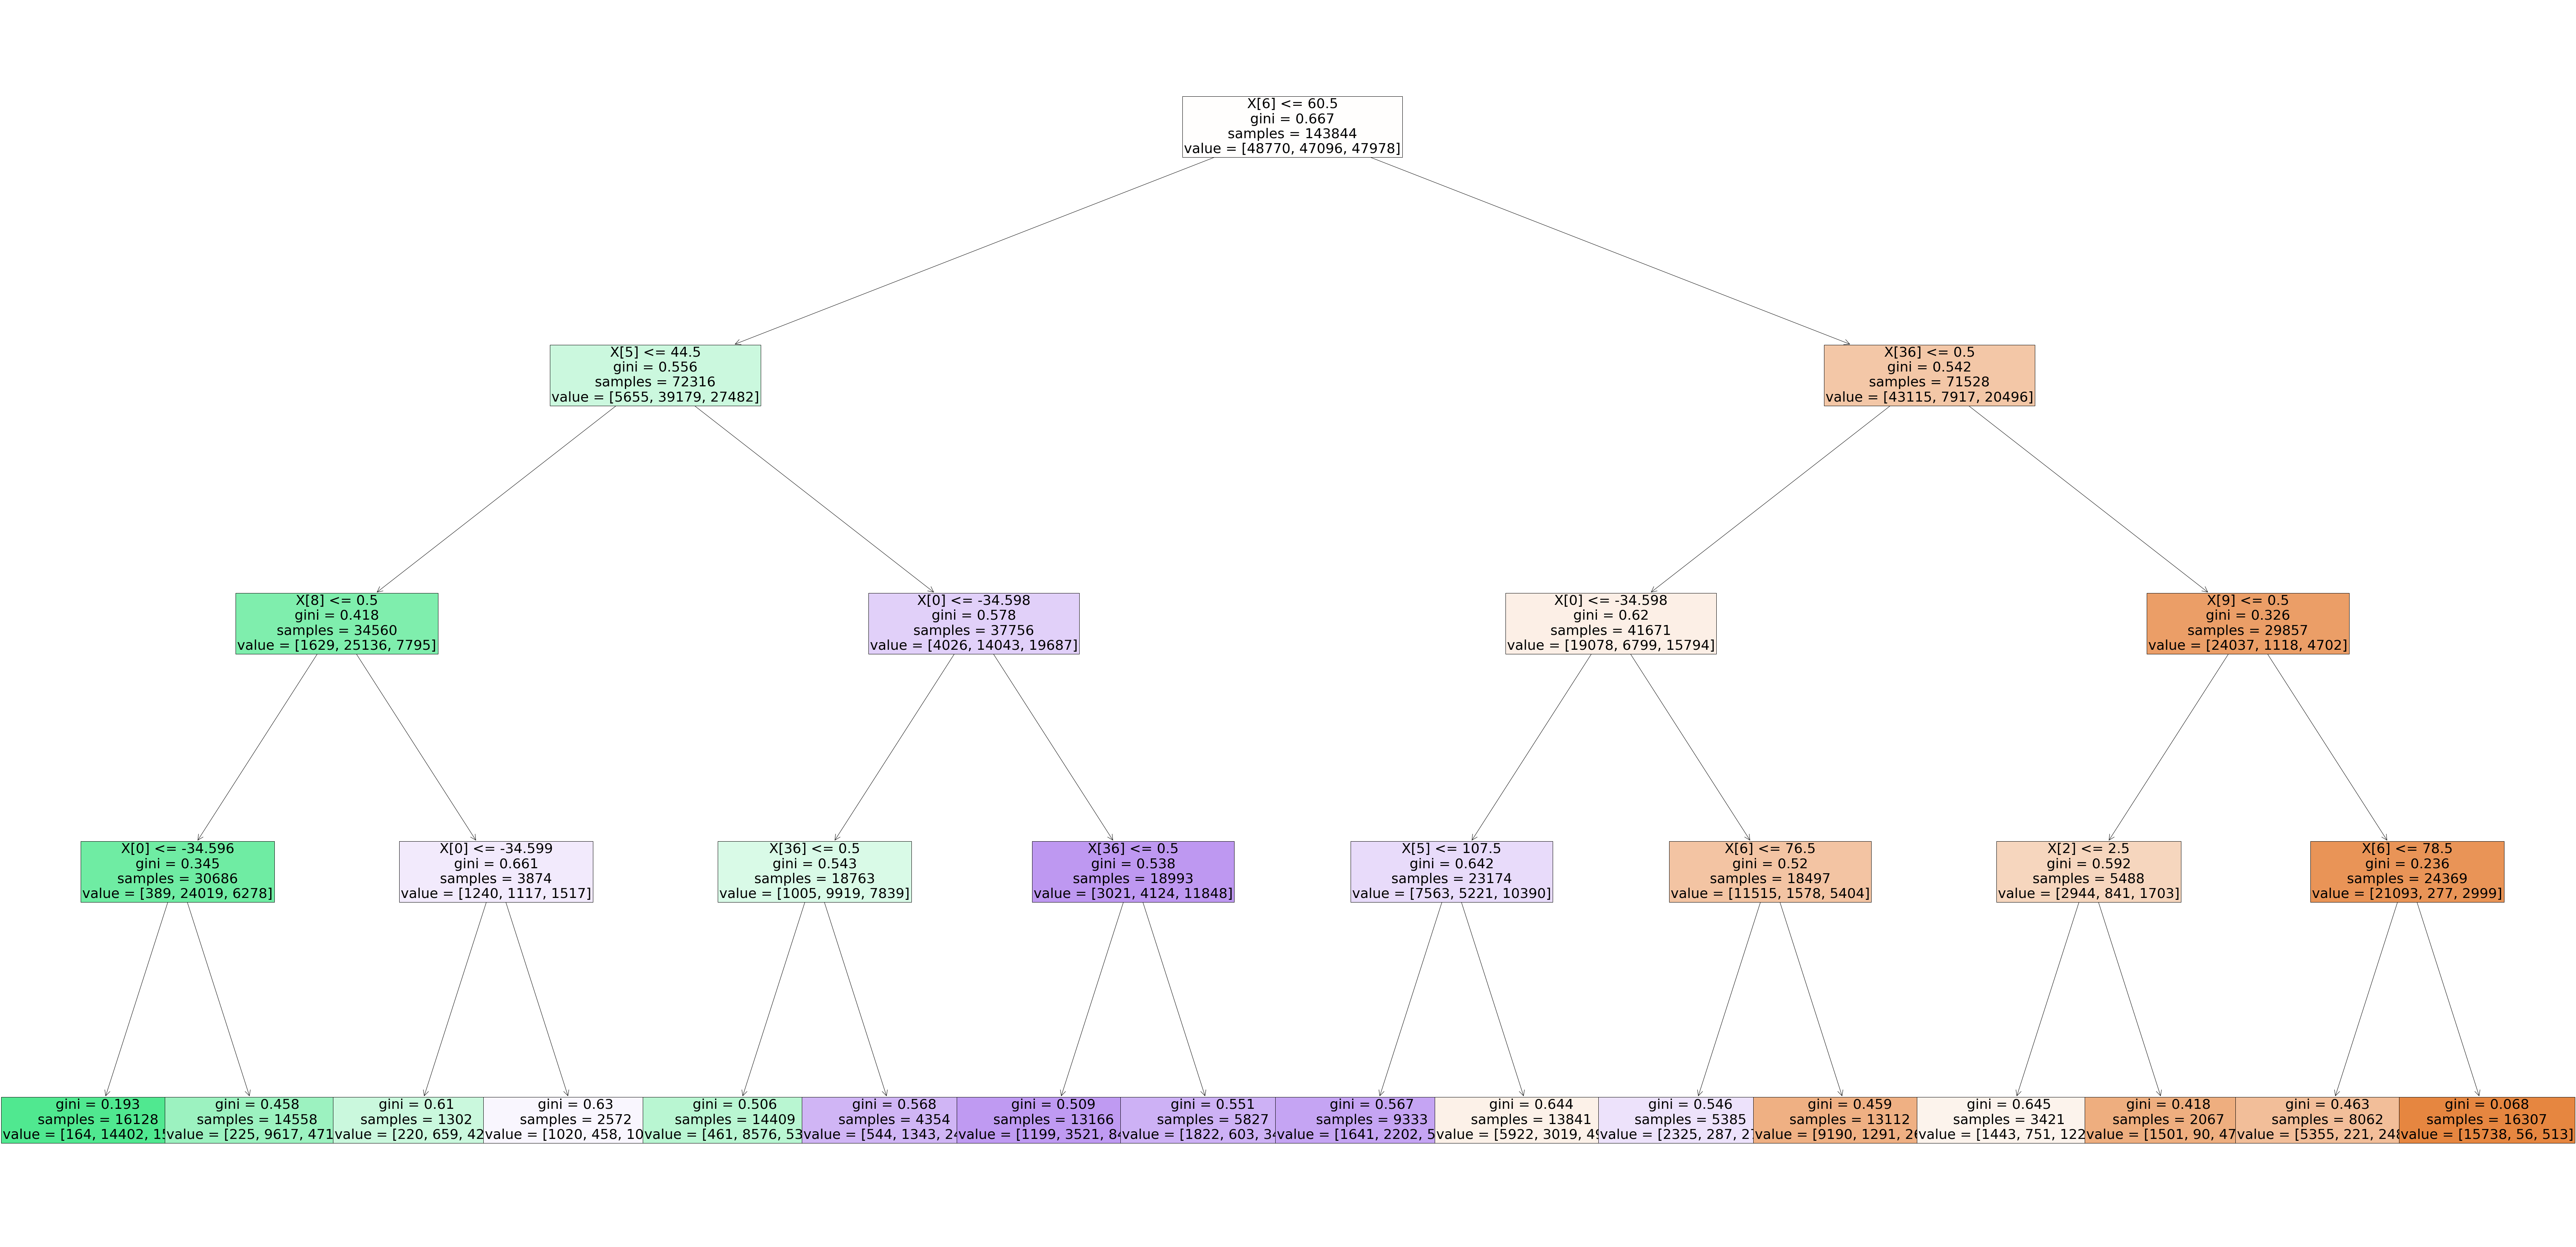

In [ ]:
plt.figure(figsize=(120,60))
plot_tree(tree,filled=True,proportion=False, fontsize = 36);

###Mejor atributo

In [ ]:
tree.feature_names_in_[6]

'surface_covered'

In [ ]:
tree.feature_importances_[6]#gini normalizado

0.5602344348178601

##Árbol con los mejores hiperparámetros

###Búsqueda aleatoria de los mejores hiperparámetros

In [ ]:
params_grid = {'criterion':['gini','entropy'],
               'splitter':['best', 'random'],
               'max_depth':list(range(1,30)),
               'ccp_alpha':np.linspace(0,0.015,100),
               'min_samples_leaf':list(range(1,11))}

kfoldcv = StratifiedKFold(n_splits=5)
base_tree = DecisionTreeClassifier()
scorer_fn = make_scorer(f1_score, average = 'weighted')
randomcv = RandomizedSearchCV(estimator=base_tree,param_distributions = params_grid,scoring=scorer_fn,cv=kfoldcv,n_iter=1000,n_jobs= -1, verbose = 10)
randomcv.fit(x_desarrollo,y_desarrollo);

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


###Resultados

In [ ]:
results = pd.DataFrame(randomcv.cv_results_)

In [ ]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_leaf,param_max_depth,param_criterion,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.469685,0.107379,0.494389,0.024108,random,2,29,entropy,0.005303,"{'splitter': 'random', 'min_samples_leaf': 2, ...",0.572073,0.563063,0.601761,0.585461,0.586459,0.581763,0.013261,557
1,3.331585,0.084633,0.478988,0.023442,best,7,16,entropy,0.013485,"{'splitter': 'best', 'min_samples_leaf': 7, 'm...",0.649926,0.649704,0.648746,0.647660,0.645061,0.648219,0.001771,178
2,1.365703,0.093704,0.517268,0.046026,best,9,3,entropy,0.006818,"{'splitter': 'best', 'min_samples_leaf': 9, 'm...",0.649926,0.649704,0.648746,0.647660,0.645061,0.648219,0.001771,178
3,2.219105,0.072214,0.500346,0.060857,best,6,8,entropy,0.002727,"{'splitter': 'best', 'min_samples_leaf': 6, 'm...",0.682943,0.679453,0.678797,0.677390,0.680723,0.679861,0.001879,63
4,3.661647,0.166699,0.417963,0.012950,random,1,21,gini,0.013788,"{'splitter': 'random', 'min_samples_leaf': 1, ...",0.560853,0.426827,0.540409,0.437758,0.409812,0.475132,0.062620,847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.172121,0.081046,0.494236,0.051527,best,7,2,entropy,0.011364,"{'splitter': 'best', 'min_samples_leaf': 7, 'm...",0.601225,0.595183,0.597260,0.596754,0.598490,0.597782,0.002022,434
996,4.349574,0.107944,0.476899,0.025936,best,1,18,entropy,0.012727,"{'splitter': 'best', 'min_samples_leaf': 1, 'm...",0.649926,0.649704,0.648746,0.647660,0.645061,0.648219,0.001771,178
997,1.546806,0.122985,0.509245,0.074913,best,6,4,entropy,0.004242,"{'splitter': 'best', 'min_samples_leaf': 6, 'm...",0.660217,0.657239,0.656698,0.657189,0.655408,0.657350,0.001578,142
998,2.398392,0.107839,0.450990,0.048667,random,8,26,entropy,0.004394,"{'splitter': 'random', 'min_samples_leaf': 8, ...",0.568332,0.596685,0.550321,0.564253,0.587963,0.573511,0.016710,584


###Mejores hiperparámetros

In [ ]:
randomcv.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 2,
 'splitter': 'best'}

###Mejor árbol

In [ ]:
best_tree = randomcv.best_estimator_

In [ ]:
best_tree = DecisionTreeClassifier(**(randomcv.best_params_))
best_tree.fit(x_desarrollo,y_desarrollo)

y_pred = best_tree.predict(x_holdout)

print(accuracy_score(y_holdout,y_pred))
print(precision_score(y_holdout,y_pred,average = None))
print(recall_score(y_holdout,y_pred,average = None))
print(f1_score(y_holdout,y_pred,average = None))

#y_pred = best_tree.predict(x_train)

#print(accuracy_score(y_train,y_pred))
#print(precision_score(y_train,y_pred,average = None))
#print(recall_score(y_train,y_pred,average = None))
#print(f1_score(y_train,y_pred,average = None))

0.797035759968856
[0.85206053 0.81090754 0.72532407]
[0.86827428 0.80815287 0.71371405]
[0.860091   0.80952786 0.71947222]


###Métricas y matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = best_tree.predict(x_holdout)
print(classification_report(y_holdout,y_pred))

              precision    recall  f1-score   support

        ALTO       0.85      0.87      0.86     12192
        BAJO       0.81      0.81      0.81     11775
       MEDIO       0.73      0.71      0.72     11995

    accuracy                           0.80     35962
   macro avg       0.80      0.80      0.80     35962
weighted avg       0.80      0.80      0.80     35962



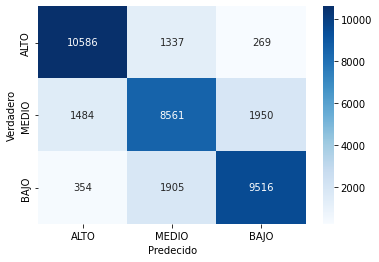

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_holdout,y_pred), columns = ['ALTO','BAJO','MEDIO'], index = ['ALTO','BAJO','MEDIO'])
cm = cm.loc[['ALTO','MEDIO','BAJO'],['ALTO','MEDIO','BAJO']]
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predecido')
plt.ylabel('Verdadero');

###Gráfico del árbol

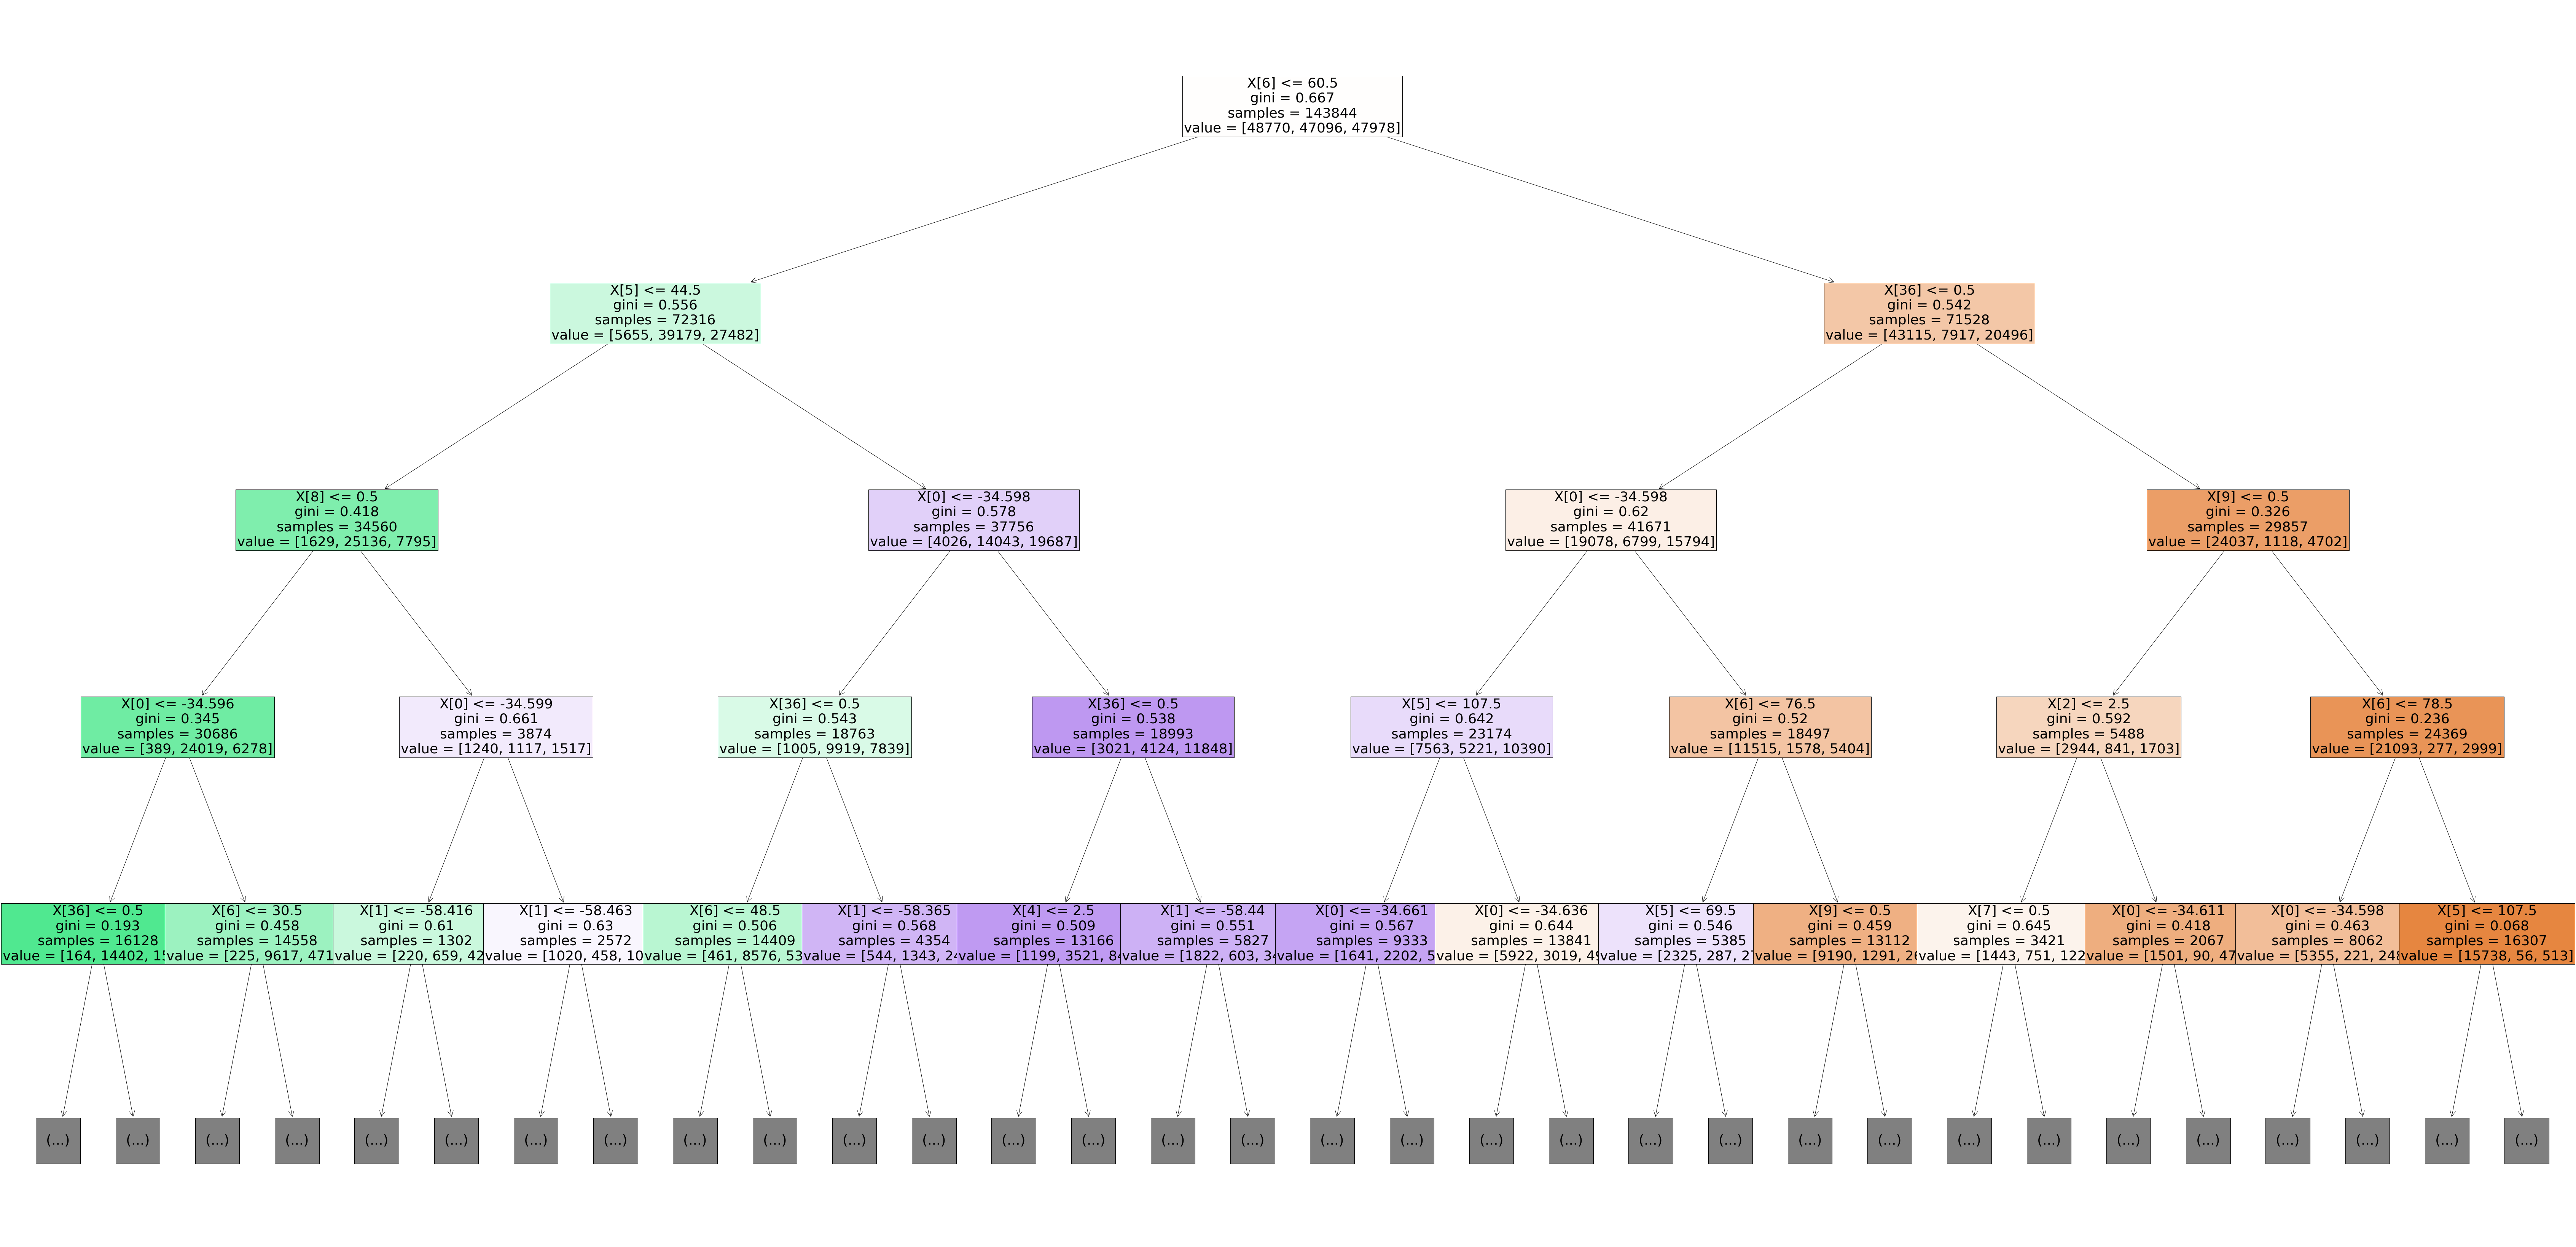

In [ ]:
plt.figure(figsize=(120,60))
plot_tree(best_tree,filled=True,proportion=False, fontsize = 36, max_depth=4);

###Análisis del árbol

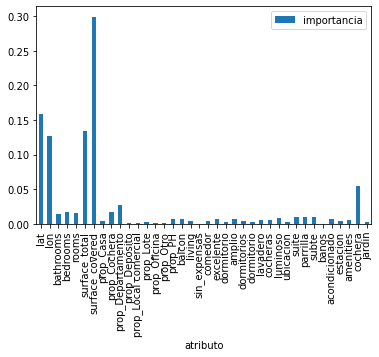

In [ ]:
pd.DataFrame({'atributo': best_tree.feature_names_in_, 'importancia': best_tree.feature_importances_}).plot.bar(x="atributo", y="importancia");

In [ ]:
tree.feature_names_in_[36]

'cochera'

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,prop_Casa,prop_Cochera,prop_Departamento,prop_Depósito,prop_Local comercial,prop_Lote,prop_Oficina,prop_Otro,prop_PH,encoded_property_type
id,,,,,,,,,,,,,,,,,,,,,
hjHZd/BZqSBy3zb+RrqPYg==,43,137,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.638910,-58.476073,Argentina,Capital Federal,...,0,0,0,0,0,1,0,0,0,5
2KF4gGpEVoyqnMVFBcF7IA==,44,149,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.562124,-58.464449,Argentina,Capital Federal,...,0,1,0,0,0,0,0,0,0,1
BRbo9ohkAnogBN3vgcbh1Q==,45,153,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.598112,-58.400784,Argentina,Capital Federal,...,0,0,0,0,0,0,1,0,0,6
twX40kvJoG1MI6LVXnRKpA==,46,154,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.614123,-58.378985,Argentina,Capital Federal,...,0,0,0,0,0,0,1,0,0,6
+KGGxikZuWylLGEfAS1QQQ==,47,155,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.603233,-58.385218,Argentina,Capital Federal,...,0,0,0,0,0,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kW2uYacPEyIcBykz/8rShA==,265117,999940,Propiedad,2020-12-04,2021-01-10,2020-12-04,-34.613926,-58.499472,Argentina,Capital Federal,...,0,0,0,0,0,0,0,0,1,8
29FiS2shjt7d2d87Xz2APA==,265118,999959,Propiedad,2020-12-04,9999-12-31,2020-12-04,-34.570592,-58.462513,Argentina,Capital Federal,...,1,0,0,0,0,0,0,0,0,0
jaNlZUF/XN/I8PWilhABqw==,265119,999977,Propiedad,2020-12-04,2020-12-30,2020-12-04,-34.573074,-58.419353,Argentina,Capital Federal,...,0,0,1,0,0,0,0,0,0,2


In [ ]:
183810-179806

4004